In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,9)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns

In [3]:
# Load Dataset
def preprocess(file):
    data = pd.read_csv(file)
    HUElec = pd.melt(data, id_vars=["Date"], var_name='time')
    HUElec['time'] = pd.to_timedelta(HUElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
    HUElec['Date'] = pd.to_datetime(HUElec['Date'], format="%m/%d/%Y")
    HUElec['Datetime'] = HUElec['Date'] + HUElec['time']
    HUElec = HUElec.set_index('Datetime')
    HUElec = HUElec.drop(['Date', 'time'], axis=1).sort_index()

    return HUElec

In [32]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\QBWater.csv'

data = preprocess(file)

data.fillna(method='ffill', inplace=True)

In [33]:
df = data.resample(rule='d').mean()

df.head()

,value
Datetime,
2008-02-13,0.299521
2008-02-14,0.248104
2008-02-15,0.243021
2008-02-16,0.149250
2008-02-17,0.149292


<AxesSubplot:xlabel='Datetime'>

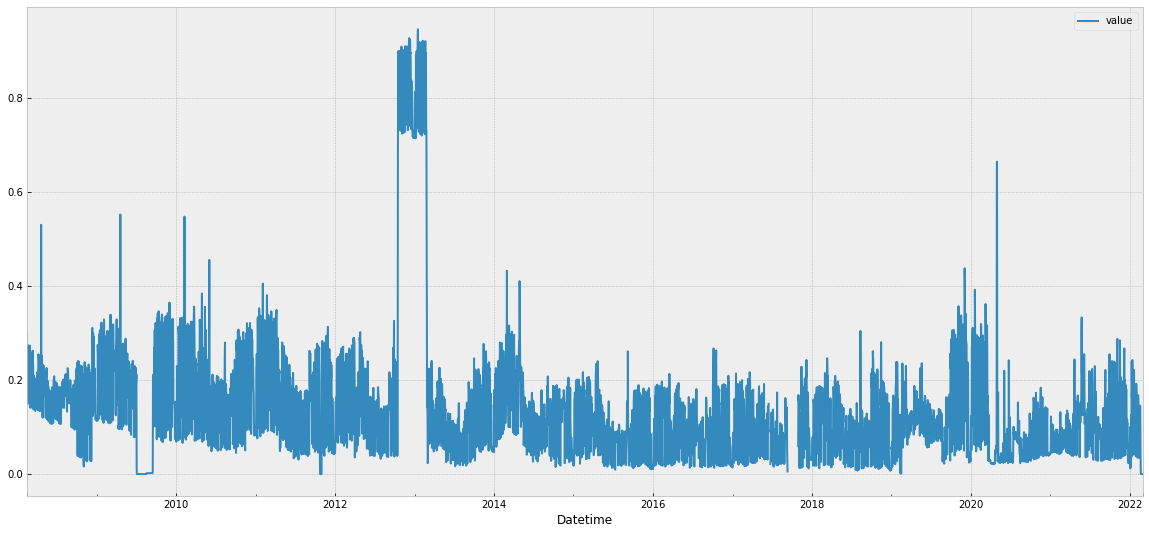

In [34]:
df.plot()

In [35]:
df['value_next_day'] = df['value'].shift(-1)

In [36]:
df = df.dropna(how='any', axis=0)
df = df.iloc[:-1]
df.tail()

,value,value_next_day
Datetime,,
2022-02-23,0.0,0.0
2022-02-24,0.0,0.0
2022-02-25,0.0,0.0
2022-02-26,0.0,0.0
2022-02-27,0.0,0.0


In [37]:
from sklearn.metrics import *

sc = MinMaxScaler()
scaler = sc.fit_transform(df)

In [38]:
scaler

array([[0.31681357, 0.26242838],
       [0.26242838, 0.25705156],
       [0.25705156, 0.1578669 ],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [39]:
scaler[:, 0]

array([0.31681357, 0.26242838, 0.25705156, ..., 0.        , 0.        ,
       0.        ])

In [40]:
# y_true = df['value']
# y_pred = df['value_next_day']

y_true = scaler[:, 0]
y_pred = scaler[:, 1]

In [41]:
from sklearn.metrics import *

print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MSE: ', mean_squared_error(y_true, y_pred))
print('MAE: ', mean_absolute_error(y_true, y_pred))
print('R2: ', r2_score(y_true, y_pred))

RMSE:  0.07458686099699717
MSE:  0.0055631998333853785
MAE:  0.04598037605504158
R2:  0.7435919353782162
